In [1]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import json
import ast
import pandas as pd

In [2]:
link_tmdb = pd.read_csv('/kaggle/input/the-movies-dataset/links.csv')
movie_metadatas = pd.read_csv('/kaggle/input/the-movies-dataset/movies_metadata.csv')
credits = pd.read_csv('/kaggle/input/the-movies-dataset/credits.csv')
rating = pd.read_csv('/kaggle/input/the-movie-datasets/new_ratings_small.csv')

/tmp/ipykernel_23/118529115.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movie_metadatas = pd.read_csv('/kaggle/input/the-movies-dataset/movies_metadata.csv')


## Get movie features

In [3]:
movie_ids = rating.movieId.unique()

In [4]:
len(movie_ids)

9025

In [5]:
movie_ids

array([  31, 1029, 1061, ...,  129, 4736, 6425])

In [6]:
def get_features(movie_id: int, link_tmdb, movie_metadatas, credits):

    # Maping movie id with tmdbId
    tmdb_id = int(link_tmdb[link_tmdb.movieId == movie_id].tmdbId.values[0])
    # Getting movie metadata by imdb id , turn tmdb to str because move_metadata.id is str col
    movie_metadata = movie_metadatas[movie_metadatas.id == str(tmdb_id)]  
    credit = credits[credits.id == tmdb_id]

    #  Getting genres
    genres_str = movie_metadata.genres.values[0]
    genres_list = ast.literal_eval(genres_str)
    genres = [genre['name'] for genre in genres_list]
    
    # Getting production companys
    pdt_company_str = movie_metadata.production_companies.values[0]
    pdt_company_list = ast.literal_eval(pdt_company_str)
    production_company = [prt_company['name'] for prt_company in pdt_company_list]
        
    # Geting prodction countries
    pdt_countries_str = movie_metadata.production_countries.values[0]
    pdt_countries_list = ast.literal_eval(pdt_countries_str)
    production_countries = [prt_countries['name'] for prt_countries in pdt_countries_list]

    # Geting runtime
    runtime = movie_metadata.runtime.values[0]
    if runtime == 0.0:
        runtime = np.nan

    # Geting casts
    cast_str = credit.cast.values[0]
    cast_list = ast.literal_eval(cast_str)
    casts = [cast['name'] for cast in cast_list]

    # Getting Overview
    overview = movie_metadata.overview.values[0]

    # Getting Release date
    release_date = movie_metadata.release_date.values[0]

    # Getting budget
    budget = float(movie_metadata.budget.values[0])
    if budget == 0.0:
        budget = np.nan
    return {
        "movieId": movie_id,
        "overview": overview,
        "casts": casts,
        "production_companies": production_company,
        "production_countries" : production_countries,
        "genres":genres,
        "runtime":runtime,
        "budget": budget,
        "release_date":release_date
    }


In [7]:
def get_movie_feature_df(movie_ids, link_tmdb, movie_metadatas, credits):
    movie_feature_list = [get_features(id, link_tmdb, movie_metadatas, credits) for id in movie_ids]
    moive_feature_df = pd.DataFrame(movie_feature_list)
    return moive_feature_df

In [8]:
movie_feature_df = get_movie_feature_df(movie_ids, link_tmdb, movie_metadatas, credits)

In [9]:
movie_feature_df

,movieId,overview,casts,production_companies,production_countries,genres,runtime,budget,release_date
0,31,Former Marine Louanne Johnson lands a gig teac...,"[Michelle Pfeiffer, George Dzundza, Courtney B...","[Hollywood Pictures, Via Rosa Productions, Don...",[United States of America],"[Drama, Crime]",99.0,NaN,1995-08-11
1,1029,Dumbo is a baby elephant born with oversized e...,"[Sterling Holloway, Herman Bing, John McLeish,...","[RKO Radio Pictures, Walt Disney Productions]",[United States of America],"[Animation, Family]",64.0,812000.0,1941-10-22
2,1061,Two gangsters seek revenge on the state jail w...,"[Robert De Niro, Brad Pitt, Kevin Bacon, Jason...","[Propaganda Films, Warner Bros., Baltimore Pic...",[United States of America],"[Crime, Drama, Thriller]",147.0,44000000.0,1996-10-18
3,1129,"In 1997, the island of Manhattan has been wall...","[Kurt Russell, Lee Van Cleef, Ernest Borgnine,...","[AVCO Embassy Pictures, Goldcrest Films Intern...",[United States of America],"[Science Fiction, Action]",99.0,6000000.0,1981-05-22
4,1172,"A filmmaker recalls his childhood, when he fel...","[Philippe Noiret, Jacques Perrin, Marco Leonar...",[Rai Tre Radiotelevisione Italiana],"[Italy, France]","[Drama, Romance]",124.0,NaN,1988-11-17
...,...,...,...,...,...,...,...,...,...
9020,64997,In this modern retelling of H.G. Wells' classi...,"[C. Thomas Howell, Rhett Giles, Jake Busey, Pe...",[Asylum],[United States of America],[Science Fiction],100.0,1000000.0,2005-06-28
9021,72380,"Norma and Arthur Lewis, a suburban couple with...","[Cameron Diaz, James Marsden, Frank Langella, ...","[Media Rights Capital, Lin Pictures, Warner Br...",[United States of America],"[Thriller, Science Fiction]",115.0,30000000.0,2009-09-17
9022,129,Pie in the Sky is a 1996 American romantic com...,"[Josh Charles, Anne Heche, John Goodman, Chris...",[],[],"[Comedy, Romance]",95.0,NaN,1996-02-09
9023,4736,A coming-of-age romantic comedy set against th...,"[Freddie Prinze Jr., Jessica Biel, Fred Ward, ...","[Tollin/Robbins Productions, Warner Bros.]",[United States of America],"[Drama, Comedy, Romance]",108.0,34000000.0,2001-08-22


In [10]:
movie_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9025 entries, 0 to 9024
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movieId               9025 non-null   int64  
 1   overview              9013 non-null   object 
 2   casts                 9025 non-null   object 
 3   production_companies  9025 non-null   object 
 4   production_countries  9025 non-null   object 
 5   genres                9025 non-null   object 
 6   runtime               9005 non-null   float64
 7   budget                4616 non-null   float64
 8   release_date          9025 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 634.7+ KB


In [11]:
movie_feature_df.describe()

,movieId,runtime,budget
count,9025.000000,9005.000000,4.616000e+03
mean,30639.609751,105.905719,3.270882e+07
std,40335.546172,29.985171,4.094489e+07
min,1.000000,2.000000,1.000000e+00
25%,2820.000000,93.000000,5.790000e+06
50%,6233.000000,102.000000,1.900000e+07
75%,55652.000000,115.000000,4.200000e+07
max,163949.000000,1140.000000,3.800000e+08


In [12]:
movie_feature_df.isna().sum()

movieId                    0
overview                  12
casts                      0
production_companies       0
production_countries       0
genres                     0
runtime                   20
budget                  4409
release_date               0
dtype: int64

In [13]:
# Find the minimum and maximum release dates
min_date = movie_feature_df['release_date'].min()
max_date = movie_feature_df['release_date'].max()

# Display the results
print(f"Minimum release date: {min_date}")
print(f"Maximum release date: {max_date}")

Minimum release date: 1902-09-01
Maximum release date: 2016-09-23


In [14]:
def process_movie_ratings(movies_df, ratings_df):
    """
    Tính trung bình rating cho mỗi movieId, làm tròn và kết hợp với movie features.

    Args:
        movies_df (pd.DataFrame): DataFrame chứa thông tin phim với cột 'movieId'.
        ratings_df (pd.DataFrame): DataFrame chứa rating với cột 'movieId', 'userId', 'timestamp', 'rating'.

    Returns:
        pd.DataFrame: DataFrame kết hợp với rating đã được xử lý.
    """
    # Tính trung bình rating cho mỗi movieId
    average_ratings = ratings_df.groupby('movieId')['rating'].mean().reset_index()
    
    # Làm tròn giá trị rating thành các bậc 0.5
    average_ratings['rating'] = (average_ratings['rating'] // 0.5 * 0.5).clip(0.5, 5.0)
    
    # Thực hiện left join với bảng movie features
    merged_df = movies_df.merge(average_ratings, on='movieId', how='left')

    # Xóa các hàng có rating = 0 (nếu có)
    merged_df = merged_df[merged_df['rating'] != 0]

    # Xóa các cột không cần thiết
    merged_df.drop(columns=['userId', 'timestamp'], inplace=True, errors='ignore')
    
    return merged_df

In [15]:
movie_rating = process_movie_ratings(movie_feature_df, rating)

In [16]:
movie_rating.drop(columns=['movieId', 'release_date'], inplace=True, errors='ignore')

In [17]:
movie_rating

,overview,casts,production_companies,production_countries,genres,runtime,budget,rating
0,Former Marine Louanne Johnson lands a gig teac...,"[Michelle Pfeiffer, George Dzundza, Courtney B...","[Hollywood Pictures, Via Rosa Productions, Don...",[United States of America],"[Drama, Crime]",99.0,NaN,3.0
1,Dumbo is a baby elephant born with oversized e...,"[Sterling Holloway, Herman Bing, John McLeish,...","[RKO Radio Pictures, Walt Disney Productions]",[United States of America],"[Animation, Family]",64.0,812000.0,3.5
2,Two gangsters seek revenge on the state jail w...,"[Robert De Niro, Brad Pitt, Kevin Bacon, Jason...","[Propaganda Films, Warner Bros., Baltimore Pic...",[United States of America],"[Crime, Drama, Thriller]",147.0,44000000.0,3.5
3,"In 1997, the island of Manhattan has been wall...","[Kurt Russell, Lee Van Cleef, Ernest Borgnine,...","[AVCO Embassy Pictures, Goldcrest Films Intern...",[United States of America],"[Science Fiction, Action]",99.0,6000000.0,3.0
4,"A filmmaker recalls his childhood, when he fel...","[Philippe Noiret, Jacques Perrin, Marco Leonar...",[Rai Tre Radiotelevisione Italiana],"[Italy, France]","[Drama, Romance]",124.0,NaN,4.0
...,...,...,...,...,...,...,...,...
9020,In this modern retelling of H.G. Wells' classi...,"[C. Thomas Howell, Rhett Giles, Jake Busey, Pe...",[Asylum],[United States of America],[Science Fiction],100.0,1000000.0,2.5
9021,"Norma and Arthur Lewis, a suburban couple with...","[Cameron Diaz, James Marsden, Frank Langella, ...","[Media Rights Capital, Lin Pictures, Warner Br...",[United States of America],"[Thriller, Science Fiction]",115.0,30000000.0,3.5
9022,Pie in the Sky is a 1996 American romantic com...,"[Josh Charles, Anne Heche, John Goodman, Chris...",[],[],"[Comedy, Romance]",95.0,NaN,3.0
9023,A coming-of-age romantic comedy set against th...,"[Freddie Prinze Jr., Jessica Biel, Fred Ward, ...","[Tollin/Robbins Productions, Warner Bros.]",[United States of America],"[Drama, Comedy, Romance]",108.0,34000000.0,1.0


## Phân tích thăm dò

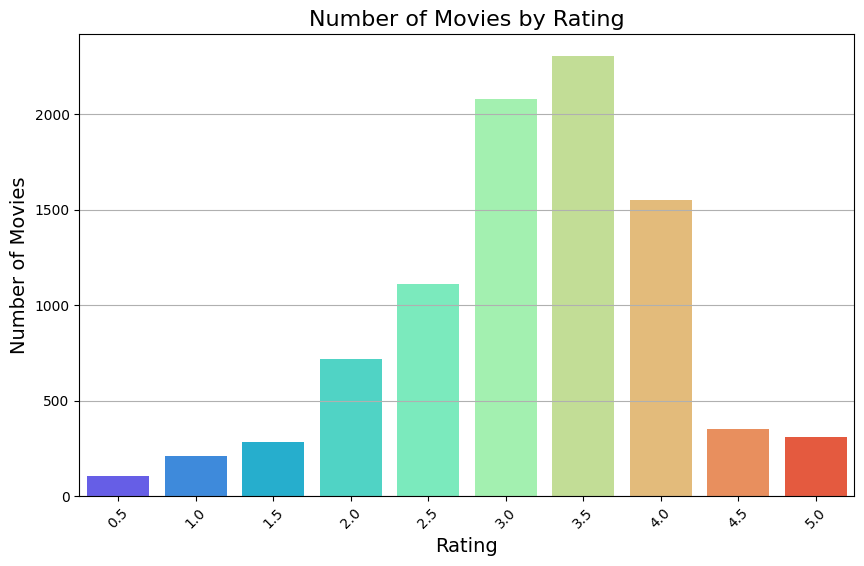

In [67]:
# Đếm số lượng cho mỗi giá trị rating
rating_counts = movie_rating['rating'].value_counts().sort_index()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='rainbow')

# Thêm tiêu đề và nhãn
plt.title('Number of Movies by Rating', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.savefig('rating_distribution.png', format='png')

# Hiển thị biểu đồ
plt.show()

### Genres

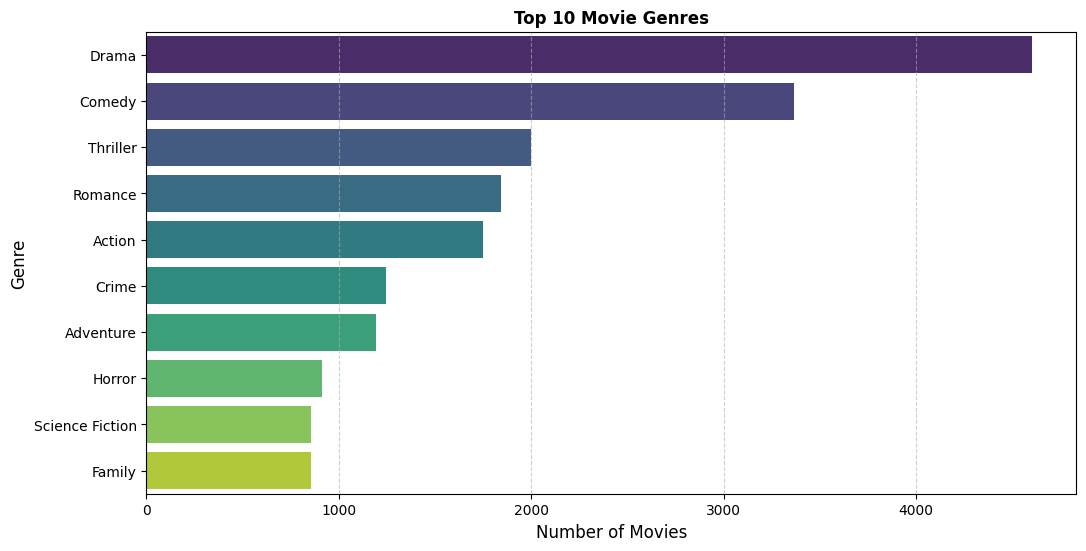

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Assuming 'genres' column contains lists of genres
all_genres = [genre for sublist in movie_rating['genres'] for genre in sublist]
genre_counts = Counter(all_genres)

# Convert to DataFrame for plotting
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Genre', data=genre_df.head(10), palette='viridis')
plt.title('Top 10 Movie Genres', weight='bold')
plt.xlabel('Number of Movies', size=12)
plt.ylabel('Genre', size=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.savefig('analysis_genres.png', format='png')
plt.show()

### Runtime

In [19]:
movie_rating[movie_rating.runtime == movie_rating['runtime'].max()]

,overview,casts,production_companies,production_countries,genres,runtime,budget,rating
8158,A survey of the musical form's history and maj...,[Keith David],[],[],[Documentary],1140.0,NaN,4.0


In [20]:
movie_rating[movie_rating['runtime'] == movie_rating['runtime'].replace(0.0, np.nan).min()]

,overview,casts,production_companies,production_countries,genres,runtime,budget,rating
5987,A baby lamp finds a ball to play with and it's...,[],[Pixar Animation Studios],[United States of America],[Animation],2.0,NaN,4.5
8211,"Bambi is nibbling the grass, unaware of the up...",[],[],[Canada],"[Animation, Comedy]",2.0,NaN,4.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


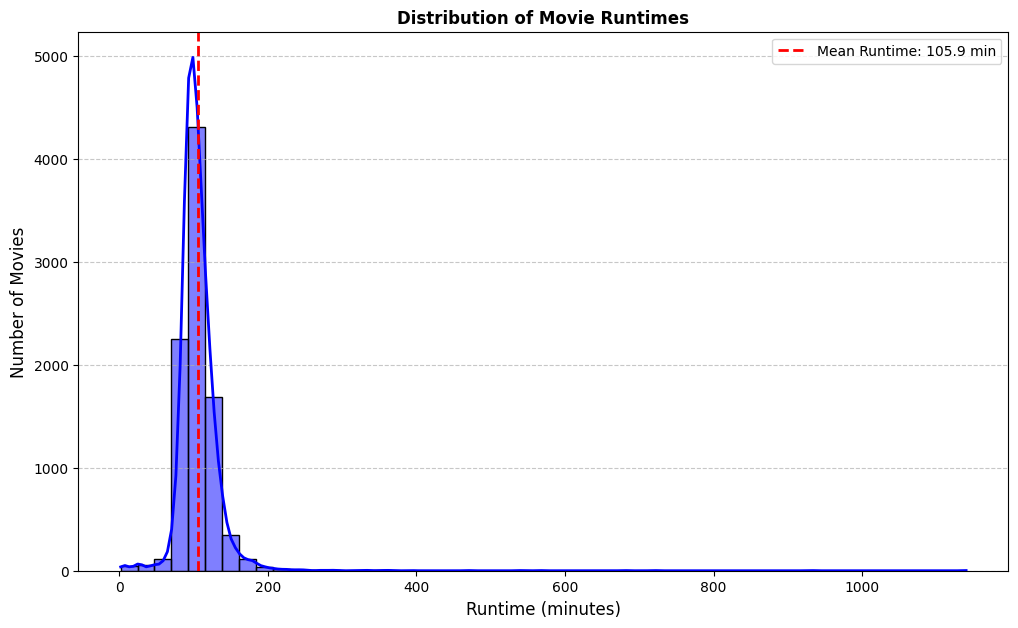

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Replace 0 runtimes with NaN to exclude them from the plot
cleaned_runtime = movie_rating['runtime'].replace(0.0, np.nan)

# Calculate mean runtime for reference
mean_runtime = cleaned_runtime.mean()

# Create the plot
plt.figure(figsize=(12, 7))

# Plot the histogram with enhanced aesthetics
sns.histplot(
    cleaned_runtime, 
    bins=50, 
    color='blue', 
    kde=True, 
    line_kws={'color': 'black', 'lw': 2}  # Customize KDE line
)

# Add mean line
plt.axvline(mean_runtime, color='red', linestyle='--', linewidth=2, label=f'Mean Runtime: {mean_runtime:.1f} min')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Enhance title and labels
plt.title('Distribution of Movie Runtimes', weight='bold')
plt.xlabel('Runtime (minutes)', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)

# Add a legend for the mean line
plt.legend()
plt.savefig('analysis_runtime.png', format='png')
# Show the plot
plt.show()


### Actors

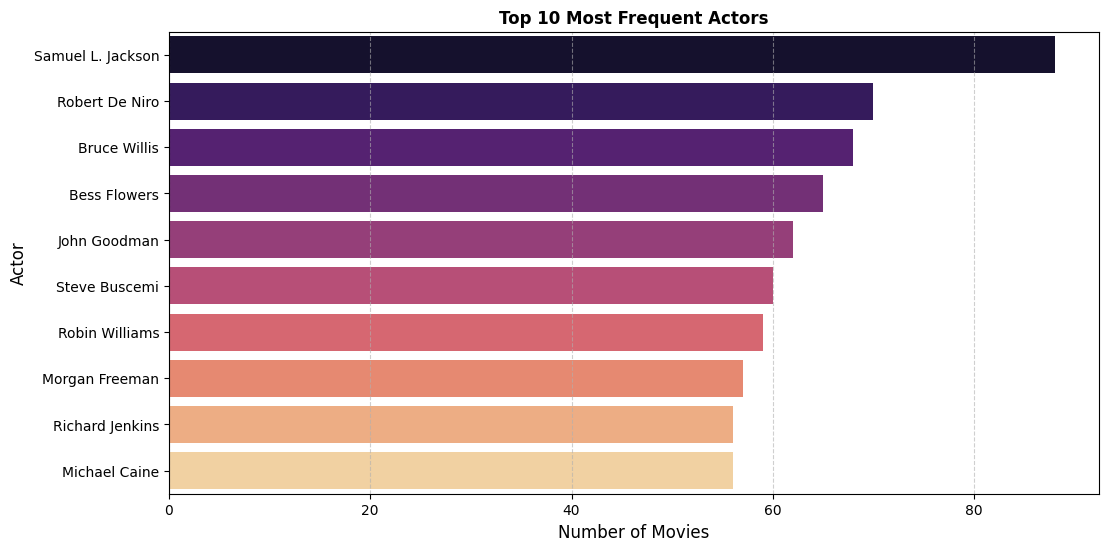

In [22]:
# Flatten the list of casts
all_casts = [actor for sublist in movie_rating['casts'] for actor in sublist if actor != " "]
cast_counts = Counter(all_casts)

# Convert to DataFrame for plotting
cast_df = pd.DataFrame(cast_counts.items(), columns=['Actor', 'Count']).sort_values(by='Count', ascending=False)

# Plot the top 10 actors
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Actor', data=cast_df.head(10), palette='magma')
plt.title('Top 10 Most Frequent Actors', weight='bold')
plt.xlabel('Number of Movies', size=12)
plt.ylabel('Actor', size=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.savefig('analysis_actors.png', format='png', bbox_inches='tight', dpi=300)
plt.show()


### Production Countries

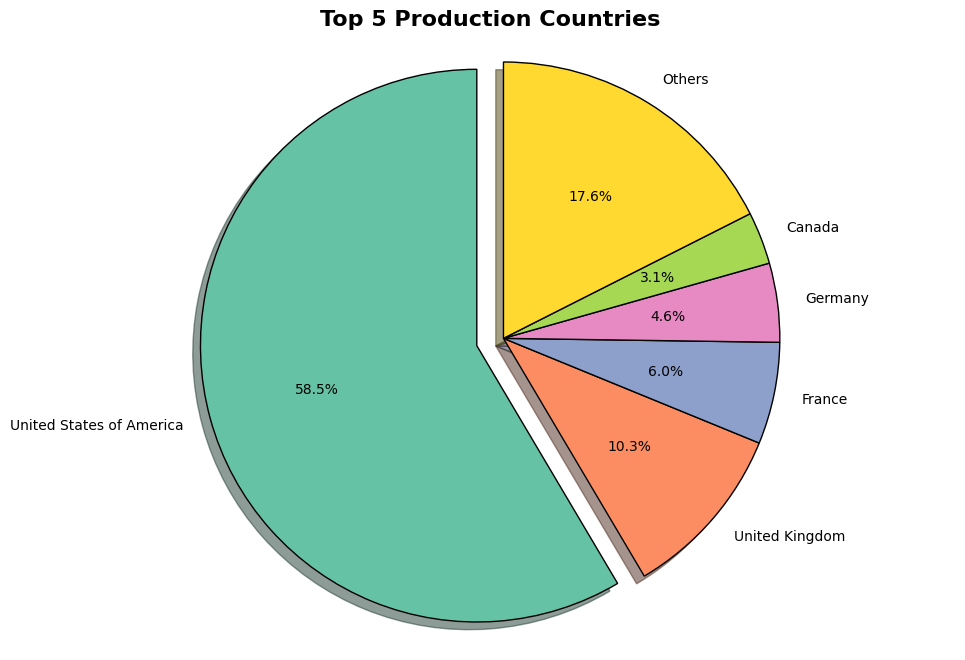

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Sample data preparation (replace this with your actual DataFrame)
# Flatten the list of production countries
all_countries = [country for sublist in movie_rating['production_countries'] for country in sublist]
country_counts = Counter(all_countries)

# Prepare data for pie chart
top_countries = dict(country_counts.most_common(5))
others = sum(country_counts.values()) - sum(top_countries.values())
top_countries['Others'] = others

# Define explode values to highlight the most significant slice
explode = [0.1 if i == max(top_countries.values()) else 0 for i in top_countries.values()]

# Plotting the improved pie chart
plt.figure(figsize=(12, 8))
plt.pie(
    top_countries.values(),
    labels=top_countries.keys(),
    autopct='%1.1f%%',
    startangle=90,  # Adjusted start angle for better visualization
    explode=explode,  # Explode the largest slice
    colors=sns.color_palette('Set2'),  # Better color palette for clear distinction
    shadow=True,  # Add shadow for a 3D effect
    wedgeprops={'edgecolor': 'black'}  # Add edge color for better slice separation
)

# Enhance the title
plt.title('Top 5 Production Countries', fontsize=16, weight='bold')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.savefig('analysis_pdt_countries.png', format='png')
plt.show()

### Production companies

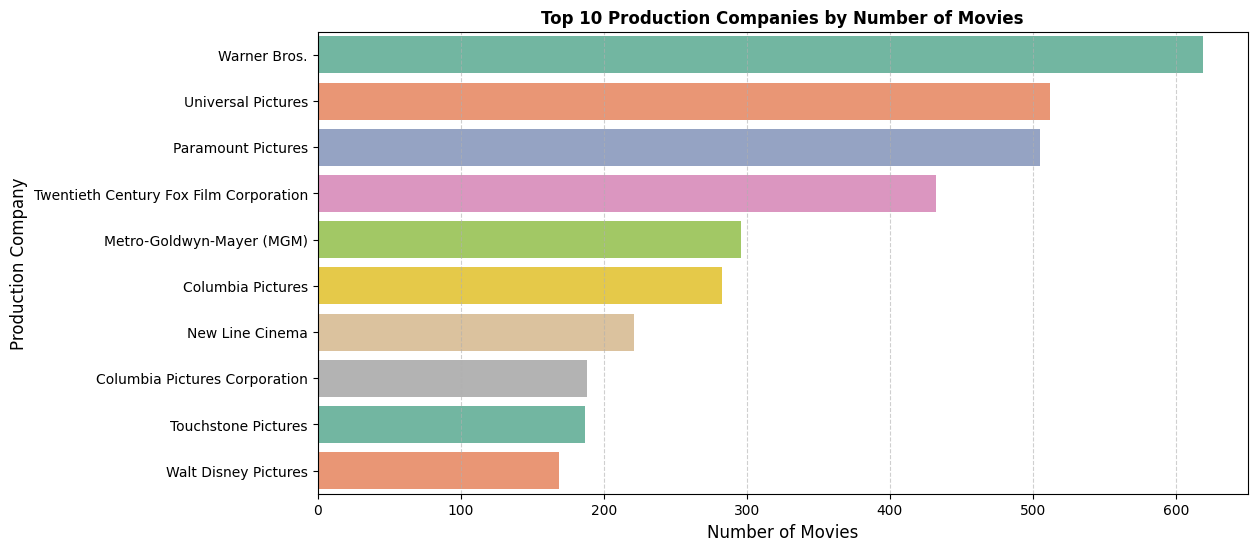

In [24]:
# Flatten the list of production companies
all_companies = [company for sublist in movie_rating['production_companies'] for company in sublist]
company_counts = Counter(all_companies)

# Convert to DataFrame for plotting
company_df = pd.DataFrame(company_counts.items(), columns=['Company', 'Count']).sort_values(by='Count', ascending=False)

# Plot the top 10 companies
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Company', data=company_df.head(10), palette='Set2')
# Enhance the title and labels
plt.title('Top 10 Production Companies by Number of Movies', weight='bold')
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Production Company', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Add a subtle grid for readability
plt.savefig('analysis_pdt_cpn.png', format='png', bbox_inches='tight', dpi=300)
plt.show()


### Overview

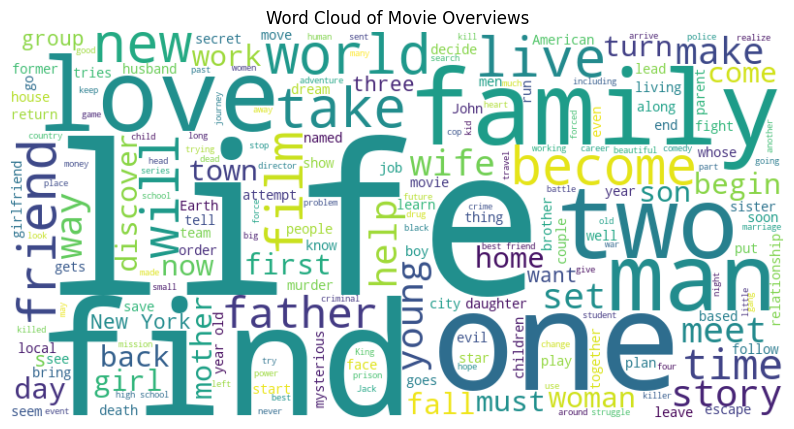

In [25]:
from wordcloud import WordCloud

# Combine all overviews into a single string
text = ' '.join(movie_rating['overview'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Overviews')
plt.show()

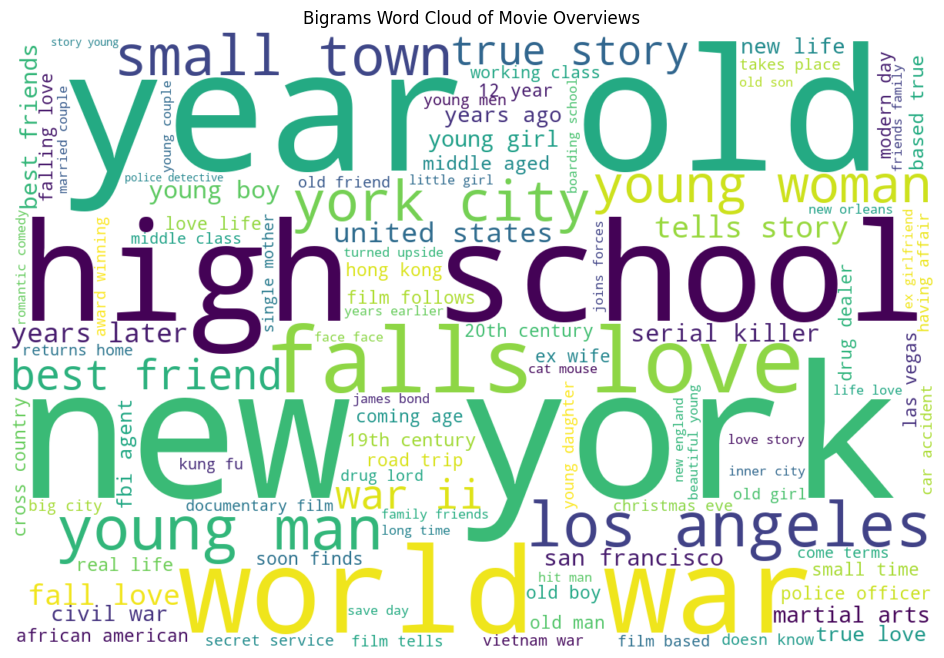

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer


# Combine all overviews into a single string, drop missing values
text_data = movie_rating['overview'].dropna()

# Use CountVectorizer to create bigrams (or trigrams with ngram_range=(3, 3))
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
ngrams = vectorizer.fit_transform(text_data)

# Sum the counts of each n-gram and create a dictionary
ngram_counts = ngrams.toarray().sum(axis=0)
ngram_freq = dict(zip(vectorizer.get_feature_names_out(), ngram_counts))

# Create the word cloud using the n-gram frequencies
wordcloud = WordCloud(
    width=1200, 
    height=800, 
    background_color='white', 
    colormap='viridis', 
    max_words=100
).generate_from_frequencies(ngram_freq)

# Plot the word cloud
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Bigrams Word Cloud of Movie Overviews')
plt.savefig('analysis_overview.png', format='png')
plt.show()


## Tiển xử lý dữ liệu

In [27]:
movie_rating

,overview,casts,production_companies,production_countries,genres,runtime,budget,rating
0,Former Marine Louanne Johnson lands a gig teac...,"[Michelle Pfeiffer, George Dzundza, Courtney B...","[Hollywood Pictures, Via Rosa Productions, Don...",[United States of America],"[Drama, Crime]",99.0,NaN,3.0
1,Dumbo is a baby elephant born with oversized e...,"[Sterling Holloway, Herman Bing, John McLeish,...","[RKO Radio Pictures, Walt Disney Productions]",[United States of America],"[Animation, Family]",64.0,812000.0,3.5
2,Two gangsters seek revenge on the state jail w...,"[Robert De Niro, Brad Pitt, Kevin Bacon, Jason...","[Propaganda Films, Warner Bros., Baltimore Pic...",[United States of America],"[Crime, Drama, Thriller]",147.0,44000000.0,3.5
3,"In 1997, the island of Manhattan has been wall...","[Kurt Russell, Lee Van Cleef, Ernest Borgnine,...","[AVCO Embassy Pictures, Goldcrest Films Intern...",[United States of America],"[Science Fiction, Action]",99.0,6000000.0,3.0
4,"A filmmaker recalls his childhood, when he fel...","[Philippe Noiret, Jacques Perrin, Marco Leonar...",[Rai Tre Radiotelevisione Italiana],"[Italy, France]","[Drama, Romance]",124.0,NaN,4.0
...,...,...,...,...,...,...,...,...
9020,In this modern retelling of H.G. Wells' classi...,"[C. Thomas Howell, Rhett Giles, Jake Busey, Pe...",[Asylum],[United States of America],[Science Fiction],100.0,1000000.0,2.5
9021,"Norma and Arthur Lewis, a suburban couple with...","[Cameron Diaz, James Marsden, Frank Langella, ...","[Media Rights Capital, Lin Pictures, Warner Br...",[United States of America],"[Thriller, Science Fiction]",115.0,30000000.0,3.5
9022,Pie in the Sky is a 1996 American romantic com...,"[Josh Charles, Anne Heche, John Goodman, Chris...",[],[],"[Comedy, Romance]",95.0,NaN,3.0
9023,A coming-of-age romantic comedy set against th...,"[Freddie Prinze Jr., Jessica Biel, Fred Ward, ...","[Tollin/Robbins Productions, Warner Bros.]",[United States of America],"[Drama, Comedy, Romance]",108.0,34000000.0,1.0


In [28]:
movie_rating.describe()

,runtime,budget,rating
count,9005.000000,4.616000e+03,9025.000000
mean,105.905719,3.270882e+07,3.163435
std,29.985171,4.094489e+07,0.883284
min,2.000000,1.000000e+00,0.500000
25%,93.000000,5.790000e+06,2.500000
50%,102.000000,1.900000e+07,3.500000
75%,115.000000,4.200000e+07,3.500000
max,1140.000000,3.800000e+08,5.000000


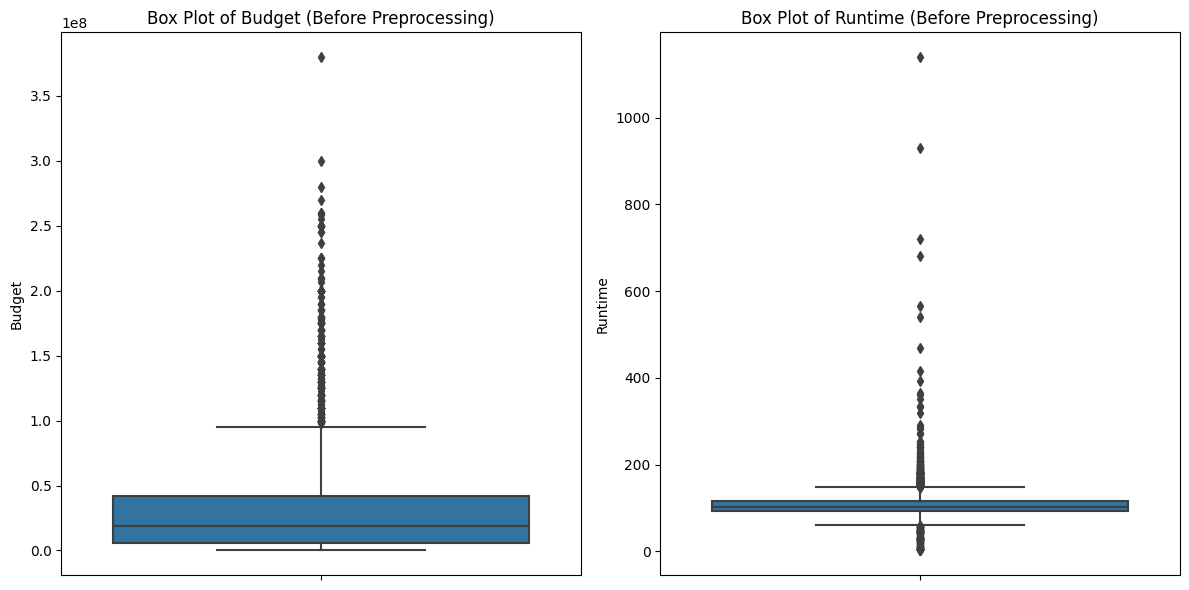

In [29]:
# Vẽ box plot trước khi tiền xử lý
plt.figure(figsize=(12, 6))

# Box plot cho budget trước tiền xử lý
plt.subplot(1, 2, 1)
sns.boxplot(y=movie_rating['budget'])
plt.title('Box Plot of Budget (Before Preprocessing)')
plt.ylabel('Budget')

# Box plot cho runtime trước tiền xử lý
plt.subplot(1, 2, 2)
sns.boxplot(y=movie_rating['runtime'])
plt.title('Box Plot of Runtime (Before Preprocessing)')
plt.ylabel('Runtime')

plt.tight_layout()
plt.savefig('before_preprocessing_budget_runtime.png', format='png')
plt.show()

In [30]:
import pandas as pd

def preprocess_budget_runtime(df):
    # Tạo một bản sao của DataFrame để tránh thay đổi df gốc
    df_copy = df.copy()
    
    # Xử lý missing values
    df_copy['budget'].fillna(df_copy['budget'].median(), inplace=True)
    df_copy['runtime'].fillna(df_copy['runtime'].median(), inplace=True)
    
    # Xử lý giá trị ngoại lệ cho budget
    Q1_budget = df_copy['budget'].quantile(0.25)
    Q3_budget = df_copy['budget'].quantile(0.75)
    IQR_budget = Q3_budget - Q1_budget
    lower_bound_budget = Q1_budget - 1.5 * IQR_budget
    upper_bound_budget = Q3_budget + 1.5 * IQR_budget
    
    # Loại bỏ hoặc điều chỉnh các giá trị ngoại lệ cho budget
    df_copy['budget'] = df_copy['budget'].clip(lower=lower_bound_budget, upper=upper_bound_budget)
    
    # Xử lý giá trị ngoại lệ cho runtime
    Q1_runtime = df_copy['runtime'].quantile(0.25)
    Q3_runtime = df_copy['runtime'].quantile(0.75)
    IQR_runtime = Q3_runtime - Q1_runtime
    lower_bound_runtime = Q1_runtime - 1.5 * IQR_runtime
    upper_bound_runtime = Q3_runtime + 1.5 * IQR_runtime
    
    # Loại bỏ hoặc điều chỉnh các giá trị ngoại lệ cho runtime
    df_copy['runtime'] = df_copy['runtime'].clip(lower=lower_bound_runtime, upper=upper_bound_runtime)
    
    return df_copy

# Tiền xử lý dữ liệu
movie_df = preprocess_budget_runtime(movie_rating)

# Kiểm tra kết quả
print(movie_df[['budget', 'runtime']].describe())
print(movie_feature_df[['budget', 'runtime']].describe())  # Kiểm tra DataFrame gốc


             budget      runtime
count  9.025000e+03  9025.000000
mean   1.896824e+07   104.815291
std    2.745859e+06    18.228793
min    1.500000e+07    60.000000
25%    1.800000e+07    93.000000
50%    1.900000e+07   102.000000
75%    2.000000e+07   115.000000
max    2.300000e+07   148.000000
             budget      runtime
count  4.616000e+03  9005.000000
mean   3.270882e+07   105.905719
std    4.094489e+07    29.985171
min    1.000000e+00     2.000000
25%    5.790000e+06    93.000000
50%    1.900000e+07   102.000000
75%    4.200000e+07   115.000000
max    3.800000e+08  1140.000000


/tmp/ipykernel_23/1950809543.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['budget'].fillna(df_copy['budget'].median(), inplace=True)
/tmp/ipykernel_23/1950809543.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

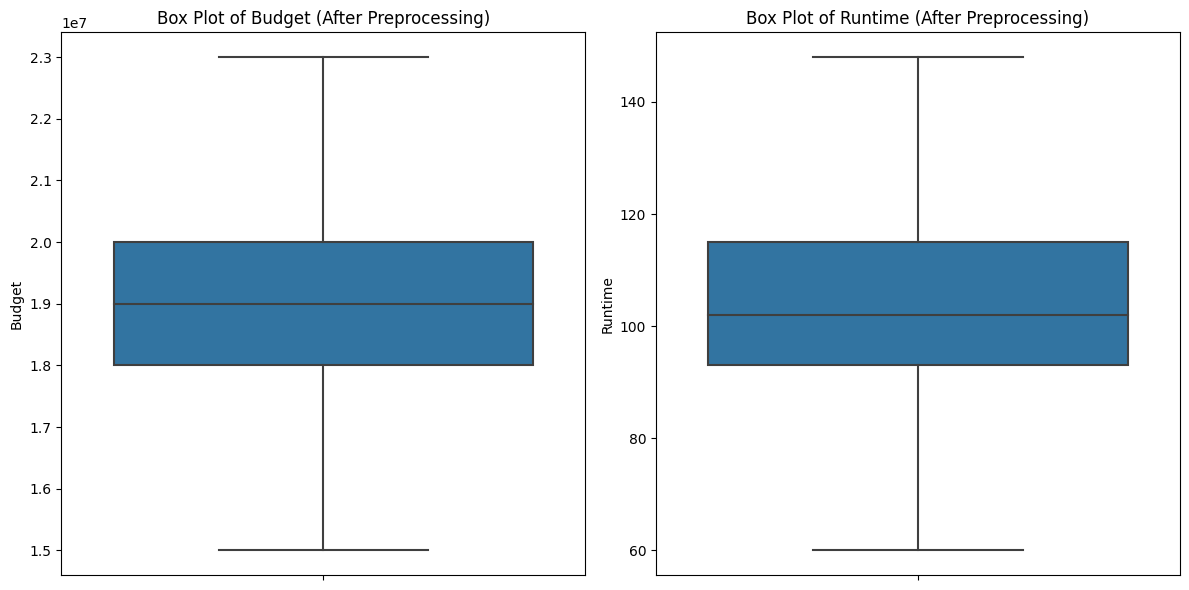

In [31]:
# Vẽ box plot sau khi tiền xử lý
plt.figure(figsize=(12, 6))

# Box plot cho budget sau tiền xử lý
plt.subplot(1, 2, 1)
sns.boxplot(y=movie_df['budget'])
plt.title('Box Plot of Budget (After Preprocessing)')
plt.ylabel('Budget')

# Box plot cho runtime sau tiền xử lý
plt.subplot(1, 2, 2)
sns.boxplot(y=movie_df['runtime'])
plt.title('Box Plot of Runtime (After Preprocessing)')
plt.ylabel('Runtime')

plt.tight_layout()
plt.savefig('after_preprocessing_budget_runtime.png', format='png')

plt.show()

In [32]:
movie_df.isna().sum()

overview                12
casts                    0
production_companies     0
production_countries     0
genres                   0
runtime                  0
budget                   0
rating                   0
dtype: int64

### Các biến multicategorical 

In [33]:
from sklearn.preprocessing import MultiLabelBinarizer

In [34]:
def process_multicategorical(df, column_names):
    """
    Xử lý biến multicategorical dạng danh sách và tạo One-Hot Encoding cho top 50% giá trị xuất hiện nhiều nhất.

    Args:
        df (pd.DataFrame): DataFrame chứa dữ liệu.
        column_name (str): Tên cột multicategorical cần xử lý.

    Returns:
        pd.DataFrame: DataFrame sau khi xử lý với các cột One-Hot Encoding mới.
    """
    df = df.copy()
    for column_name in column_names:
        # Bước 1: Gộp tất cả các giá trị trong cột (danh sách) thành một danh sách lớn
        all_values = [item for sublist in df[column_name] for item in sublist]
        
        # Bước 2: Đếm tần suất xuất hiện của từng giá trị
        value_counts = Counter(all_values)
        
        # Bước 3: Lấy top 50% giá trị xuất hiện nhiều nhất
        top_n = int(len(value_counts) * 0.5)  # Số lượng top giá trị
        if top_n > 10:
            top_n = 10
        top_categories = [v[0] for v in value_counts.most_common(top_n)]
        
        # Bước 4: Tạo các cột One-Hot Encoding
        for category in top_categories:
            new_column_name = f"{column_name}_{category}"
            df[new_column_name] = df[column_name].apply(
                lambda x: 1 if category in x else 0
            )
    
        # Bước 5: Xóa column cũ
        df.drop([column_name], axis=1, inplace=True)
    
    return df

In [35]:
movie_df = process_multicategorical(movie_df, ['genres', 'casts', 'production_companies', 'production_countries'])

In [36]:
movie_df.columns

Index(['overview', 'runtime', 'budget', 'rating', 'genres_Drama',
       'genres_Comedy', 'genres_Thriller', 'genres_Romance', 'genres_Action',
       'genres_Crime', 'genres_Adventure', 'genres_Horror',
       'genres_Science Fiction', 'genres_Family', 'casts_Samuel L. Jackson',
       'casts_Robert De Niro', 'casts_Bruce Willis', 'casts_Bess Flowers',
       'casts_John Goodman', 'casts_Steve Buscemi', 'casts_Robin Williams',
       'casts_Morgan Freeman', 'casts_Richard Jenkins', 'casts_Michael Caine',
       'production_companies_Warner Bros.',
       'production_companies_Universal Pictures',
       'production_companies_Paramount Pictures',
       'production_companies_Twentieth Century Fox Film Corporation',
       'production_companies_Metro-Goldwyn-Mayer (MGM)',
       'production_companies_Columbia Pictures',
       'production_companies_New Line Cinema',
       'production_companies_Columbia Pictures Corporation',
       'production_companies_Touchstone Pictures',
       'pr

In [37]:
len(movie_df.columns)

44

In [38]:
movie_df

,overview,runtime,budget,rating,genres_Drama,genres_Comedy,genres_Thriller,genres_Romance,genres_Action,genres_Crime,...,production_countries_United States of America,production_countries_United Kingdom,production_countries_France,production_countries_Germany,production_countries_Canada,production_countries_Japan,production_countries_Italy,production_countries_Australia,production_countries_Spain,production_countries_Hong Kong
0,Former Marine Louanne Johnson lands a gig teac...,99.0,19000000.0,3.0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,Dumbo is a baby elephant born with oversized e...,64.0,15000000.0,3.5,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Two gangsters seek revenge on the state jail w...,147.0,23000000.0,3.5,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,"In 1997, the island of Manhattan has been wall...",99.0,15000000.0,3.0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,"A filmmaker recalls his childhood, when he fel...",124.0,19000000.0,4.0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9020,In this modern retelling of H.G. Wells' classi...,100.0,15000000.0,2.5,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9021,"Norma and Arthur Lewis, a suburban couple with...",115.0,23000000.0,3.5,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9022,Pie in the Sky is a 1996 American romantic com...,95.0,19000000.0,3.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9023,A coming-of-age romantic comedy set against th...,108.0,23000000.0,1.0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


### Biến text overview

In [39]:
import torch
from transformers import AutoTokenizer, AutoModel

def process_text_embeddings(df, column_name, model_name='google-bert/bert-base-cased'):
    """
    Tạo embedding cho cột overview bằng mô hình pre-trained Roberta.
    Những dòng null sẽ được thay thế bằng trung bình của tất cả các embedding.

    Args:
        df (pd.DataFrame): DataFrame chứa dữ liệu.
        column_name (str): Tên cột cần tạo embedding.
        model_name (str): Tên mô hình pre-trained từ Hugging Face.

    Returns:
        pd.DataFrame: DataFrame với cột embedding mới.
    """
    # Load tokenizer và model từ Hugging Face
    df = df.copy()
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModel.from_pretrained(model_name)
    
    # Đảm bảo sử dụng GPU nếu có
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    # Danh sách lưu các embedding
    embeddings = []
    
    # Duyệt qua từng dòng trong cột
    for overview in df[column_name]:
        if pd.isnull(overview):  # Nếu giá trị null
            embeddings.append(None)
        else:
            # Tokenize và encode dữ liệu
            inputs = tokenizer(overview, return_tensors="pt", truncation=True, padding=True, max_length=128)
            inputs = {key: value.to(device) for key, value in inputs.items()}
            
            # Tạo embedding
            with torch.no_grad():
                outputs = model(**inputs)
                # Lấy giá trị embedding từ last hidden state (trung bình tất cả các token)
                embedding = outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()
                embeddings.append(embedding)
    
    # Tính trung bình embedding cho các dòng không null
    valid_embeddings = [embed for embed in embeddings if embed is not None]
    mean_embedding = torch.tensor(valid_embeddings).mean(dim=0).numpy()
    
    # Thay thế các giá trị null bằng trung bình
    final_embeddings = [
        embed if embed is not None else mean_embedding for embed in embeddings
    ]
    
    # Lưu embedding vào DataFrame
    df[f"{column_name}_embedding"] = final_embeddings
    df.drop(column_name, axis=1, inplace=True)
    
    return df

In [40]:
movie_df = process_text_embeddings(movie_df, 'overview')

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

/tmp/ipykernel_23/4282548186.py:47: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /usr/local/src/pytorch/torch/csrc/utils/tensor_new.cpp:278.)
  mean_embedding = torch.tensor(valid_embeddings).mean(dim=0).numpy()


In [41]:
movie_df

,runtime,budget,rating,genres_Drama,genres_Comedy,genres_Thriller,genres_Romance,genres_Action,genres_Crime,genres_Adventure,...,production_countries_United Kingdom,production_countries_France,production_countries_Germany,production_countries_Canada,production_countries_Japan,production_countries_Italy,production_countries_Australia,production_countries_Spain,production_countries_Hong Kong,overview_embedding
0,99.0,19000000.0,3.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,"[-0.11444286, -0.045299724, 0.018450717, 0.359..."
1,64.0,15000000.0,3.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[-0.017463947, 0.07127476, -0.04539273, 0.1622..."
2,147.0,23000000.0,3.5,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,"[0.039337333, -0.0902321, -0.07211118, 0.37264..."
3,99.0,15000000.0,3.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,"[0.061147183, -0.09689344, 0.08936329, 0.27678..."
4,124.0,19000000.0,4.0,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,"[0.16307196, -0.20412594, -0.07814471, 0.28972..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9020,100.0,15000000.0,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[0.07730784, -0.030355955, -0.08915206, 0.2518..."
9021,115.0,23000000.0,3.5,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[0.11819603, -0.09099656, 0.009846184, 0.43026..."
9022,95.0,19000000.0,3.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,"[-0.014537086, -0.17165253, -0.023489367, 0.55..."
9023,108.0,23000000.0,1.0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,"[-0.04122773, -0.21957603, -0.019358553, 0.594..."


In [42]:
from sklearn.preprocessing import MinMaxScaler

def scale_minmax(df):
    df = df.copy()
    scaler = MinMaxScaler()
    
    columns_to_scale = ['budget', 'runtime']
    
    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    
    return df

In [43]:
movie_df = scale_minmax(movie_df)

In [44]:
movie_df

,runtime,budget,rating,genres_Drama,genres_Comedy,genres_Thriller,genres_Romance,genres_Action,genres_Crime,genres_Adventure,...,production_countries_United Kingdom,production_countries_France,production_countries_Germany,production_countries_Canada,production_countries_Japan,production_countries_Italy,production_countries_Australia,production_countries_Spain,production_countries_Hong Kong,overview_embedding
0,0.443182,0.5,3.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,"[-0.11444286, -0.045299724, 0.018450717, 0.359..."
1,0.045455,0.0,3.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[-0.017463947, 0.07127476, -0.04539273, 0.1622..."
2,0.988636,1.0,3.5,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,"[0.039337333, -0.0902321, -0.07211118, 0.37264..."
3,0.443182,0.0,3.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,"[0.061147183, -0.09689344, 0.08936329, 0.27678..."
4,0.727273,0.5,4.0,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,"[0.16307196, -0.20412594, -0.07814471, 0.28972..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9020,0.454545,0.0,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[0.07730784, -0.030355955, -0.08915206, 0.2518..."
9021,0.625000,1.0,3.5,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[0.11819603, -0.09099656, 0.009846184, 0.43026..."
9022,0.397727,0.5,3.0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,"[-0.014537086, -0.17165253, -0.023489367, 0.55..."
9023,0.545455,1.0,1.0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,"[-0.04122773, -0.21957603, -0.019358553, 0.594..."


In [45]:
movie_df.columns

Index(['runtime', 'budget', 'rating', 'genres_Drama', 'genres_Comedy',
       'genres_Thriller', 'genres_Romance', 'genres_Action', 'genres_Crime',
       'genres_Adventure', 'genres_Horror', 'genres_Science Fiction',
       'genres_Family', 'casts_Samuel L. Jackson', 'casts_Robert De Niro',
       'casts_Bruce Willis', 'casts_Bess Flowers', 'casts_John Goodman',
       'casts_Steve Buscemi', 'casts_Robin Williams', 'casts_Morgan Freeman',
       'casts_Richard Jenkins', 'casts_Michael Caine',
       'production_companies_Warner Bros.',
       'production_companies_Universal Pictures',
       'production_companies_Paramount Pictures',
       'production_companies_Twentieth Century Fox Film Corporation',
       'production_companies_Metro-Goldwyn-Mayer (MGM)',
       'production_companies_Columbia Pictures',
       'production_companies_New Line Cinema',
       'production_companies_Columbia Pictures Corporation',
       'production_companies_Touchstone Pictures',
       'production_com

## Lựa chọn feature (Feature Selection)

In [46]:
movie_ratings = movie_df

In [47]:
def plot_rating_distributions(df, target_col):
    """
    Vẽ phân phối của rating theo các nhóm trong các biến multicategorical.

    Args:
        df (pd.DataFrame): DataFrame chứa dữ liệu.
        target_col (str): Tên cột biến mục tiêu (rating).
    """
    # Lấy danh sách các cột multicategorical
    multicategorical_cols = [col for col in df.columns if col.startswith(('genres_', 'casts_', 'production_companies_', 'production_countries_'))]
    
    # Số lượng cột multicategorical
    num_cols = len(multicategorical_cols)
    if num_cols == 0:
        print("Không có cột multicategorical nào để trực quan hóa.")
        return
    
    # Thiết lập kích thước biểu đồ
    n_cols = 6  # Số cột trong lưới
    n_rows = (num_cols // n_cols) + (num_cols % n_cols > 0)  # Tính số hàng cần thiết
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows), squeeze=False)
    
    # Vẽ từng biểu đồ
    for i, col in enumerate(multicategorical_cols):
        row, col_idx = divmod(i, n_cols)  # Tính vị trí hàng và cột trong lưới
        ax = axes[row][col_idx]
        
        # Vẽ boxplot cho cột hiện tại
        sns.boxplot(x=df[col], y=df[target_col], ax=ax)
        ax.set_title(f"Rating theo {col}")
        ax.set_xlabel(col)
        ax.set_ylabel(target_col)
    
    # Xóa các ô thừa (nếu có)
    for j in range(i + 1, n_rows * n_cols):
        row, col_idx = divmod(j, n_cols)
        axes[row][col_idx].axis("off")
    
    plt.tight_layout()
    plt.show()

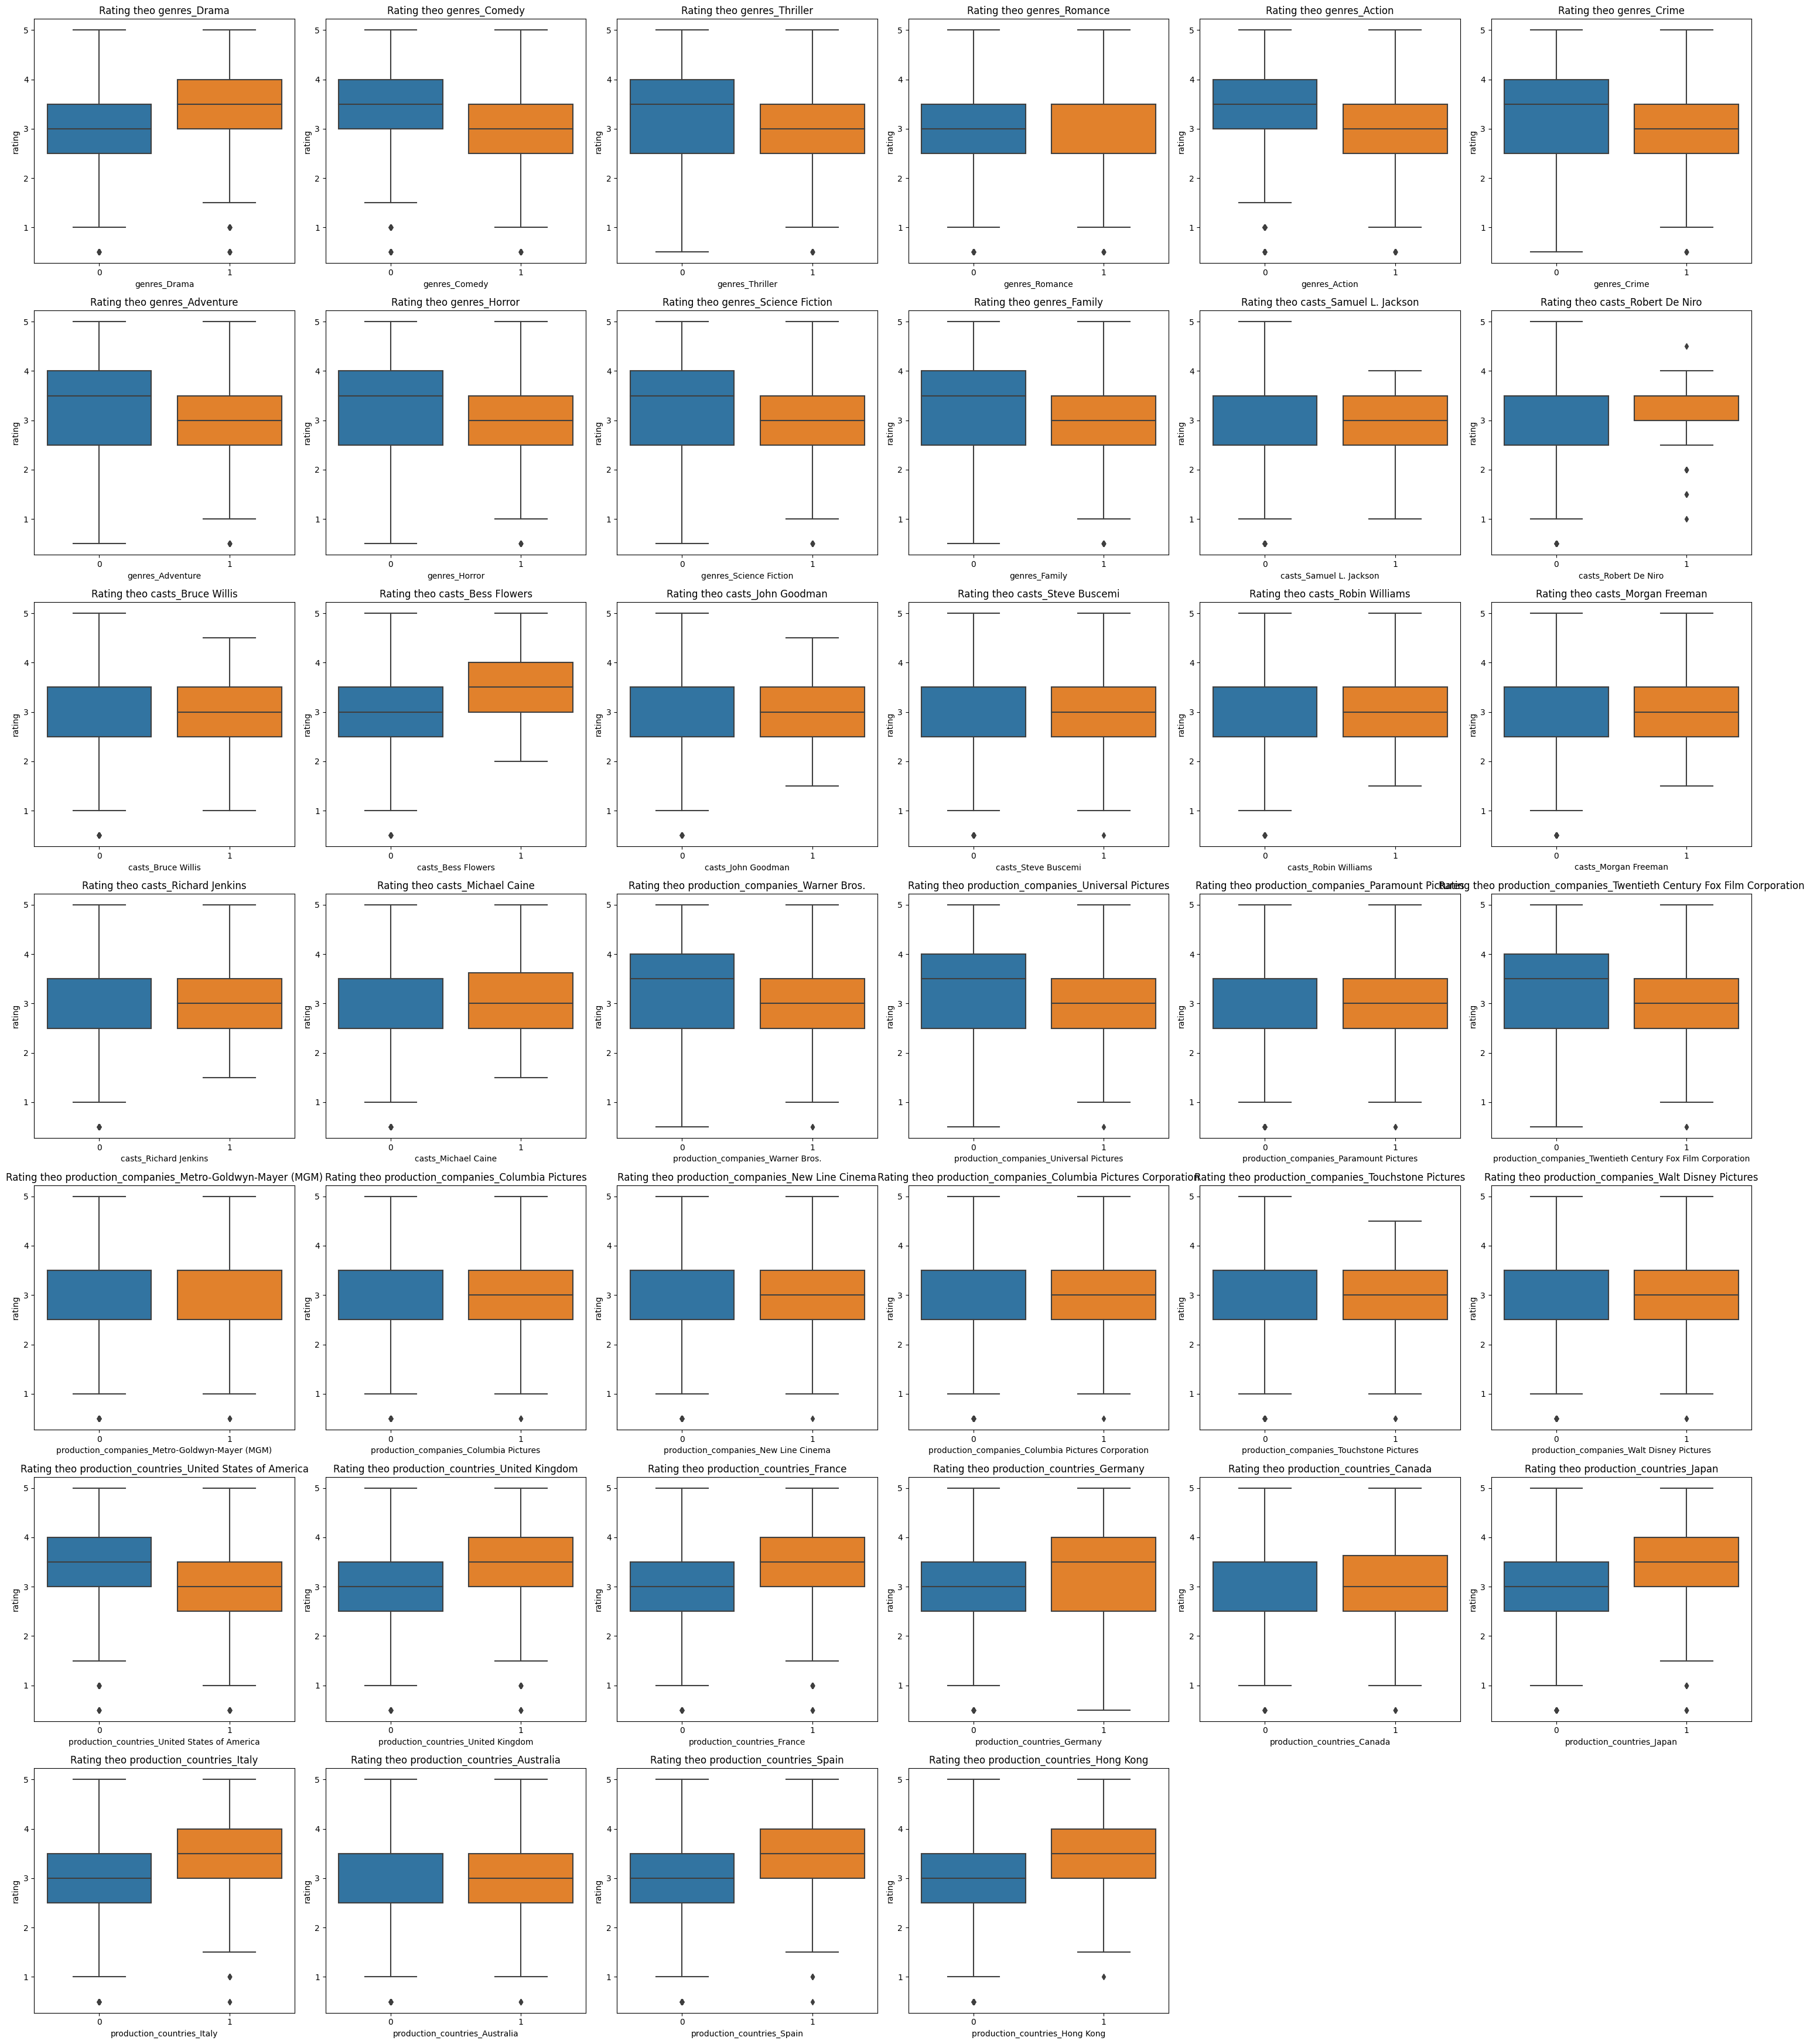

In [48]:
plot_rating_distributions(movie_ratings, 'rating')

In [49]:
import scipy.stats as stats

def statistical_tests(df, target_col, significance_level=0.05):
    """
    Thực hiện kiểm định thống kê giữa các biến độc lập và biến mục tiêu.
    Xóa các cột không ảnh hưởng đến biến mục tiêu dựa trên p-value.

    Args:
        df (pd.DataFrame): DataFrame chứa dữ liệu.
        target_col (str): Tên cột biến mục tiêu (rating).
        significance_level (float): Mức ý nghĩa để xác định biến ảnh hưởng.

    Returns:
        pd.DataFrame: DataFrame sau khi xóa các cột không ảnh hưởng.
        list: Danh sách các cột không ảnh hưởng.
    """
    # Lưu trữ các cột không ảnh hưởng
    non_significant_cols = []
    
    # Lấy danh sách các cột multicategorical (các cột có prefix như genres_, casts_, production_companies_, production_countries_)
    multicategorical_cols = [col for col in df.columns if col.startswith(('genres_', 'casts_', 'production_companies_', 'production_countries_'))]
    
    # Kiểm định thống kê cho các biến multicategorical
    for col in multicategorical_cols:
        try:
            # Tách các nhóm (0 và 1) trong biến multicategorical
            group0 = df[df[col] == 0][target_col]
            group1 = df[df[col] == 1][target_col]
            
            # Thực hiện t-test (kiểm định khác biệt giữa hai nhóm)
            t_stat, p_value = stats.ttest_ind(group0, group1, nan_policy='omit')
            
            # Nếu p-value > significance_level, thêm cột vào danh sách không ảnh hưởng
            if p_value > significance_level:
                non_significant_cols.append(col)
        except:
            continue
    
    # Kiểm định thống kê cho các biến numerical
    numerical_cols = ['runtime', 'budget']
    for col in numerical_cols:
        try:
            # Tính hệ số tương quan Pearson
            corr, p_value = stats.pearsonr(df[col], df[target_col])
            
            # Nếu p-value > significance_level, thêm cột vào danh sách không ảnh hưởng
            if p_value > significance_level:
                non_significant_cols.append(col)
        except:
            continue
    
    # Xóa các cột không ảnh hưởng khỏi DataFrame
    df = df.drop(columns=non_significant_cols)
    
    return df, non_significant_cols

In [50]:
# Thực hiện kiểm định
df_cleaned, non_significant_cols = statistical_tests(movie_ratings, target_col="rating")

# Kết quả
print(f"Các cột không ảnh hưởng đến rating: {non_significant_cols} Với số lượng {len(non_significant_cols)}", )

Các cột không ảnh hưởng đến rating: ['genres_Romance', 'casts_Samuel L. Jackson', 'casts_Robert De Niro', 'casts_Steve Buscemi', 'casts_Robin Williams', 'casts_Morgan Freeman', 'casts_Richard Jenkins', 'casts_Michael Caine', 'production_companies_Paramount Pictures', 'production_companies_Metro-Goldwyn-Mayer (MGM)', 'production_companies_Columbia Pictures Corporation', 'production_companies_Walt Disney Pictures', 'production_countries_Germany', 'production_countries_Canada'] Với số lượng 14


In [51]:
df = df_cleaned

In [52]:
len(df['overview_embedding'][0])

768

## Phát triển mô hình

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
import pandas as pd
from sklearn.decomposition import PCA

def preprocess_data(df, target_col, embedding_col):
    """
    Xử lý dữ liệu trước khi huấn luyện mô hình:
    - Chuyển embedding thành vector và giảm chiều bằng PCA.
    - Chuẩn hóa dữ liệu.
    
    Args:
        df (pd.DataFrame): Dữ liệu đầu vào.
        target_col (str): Tên cột biến mục tiêu.
        embedding_col (str): Tên cột chứa embedding.
    
    Returns:
        X (pd.DataFrame): Features sau khi xử lý.
        y (pd.Series): Biến mục tiêu.
    """
    # Tách embedding thành các cột riêng
    embedding_df = df[embedding_col].apply(pd.Series)
    
    # Áp dụng PCA để giảm chiều từ 768 về 100
    pca = PCA(n_components=100)
    reduced_embeddings = pca.fit_transform(embedding_df)

    # Chuyển đổi thành DataFrame
    reduced_embedding_df = pd.DataFrame(reduced_embeddings, columns=[f"{embedding_col}_pca_{i}" for i in range(100)])

    # Gộp embedding đã giảm chiều vào dữ liệu chính
    df = pd.concat([df.drop(columns=[embedding_col]), reduced_embedding_df], axis=1)
    
    # Tách biến mục tiêu và features
    y = df[target_col]
    X = df.drop(columns=[target_col])
    
    return X, y

In [55]:
X, y = preprocess_data(df, target_col="rating", embedding_col="overview_embedding")

In [56]:
X.shape

(9025, 128)

In [57]:
y.shape

(9025,)

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LogisticRegression  # Thêm LinearRegression và LogisticRegression
from math import sqrt

def plot_distribution(y_true, y_pred, model_name):
    """
    Vẽ biểu đồ phân phối giữa giá trị thực tế và dự đoán.
    
    Args:
        y_true (pd.Series): Giá trị thực tế.
        y_pred (np.array): Giá trị dự đoán.
        model_name (str): Tên mô hình.
    """
    plt.figure(figsize=(10, 6))
    sns.kdeplot(y_true, label='Actual Values', color='blue', fill=True, alpha=0.5)
    sns.kdeplot(y_pred, label='Predicted Values', color='red', fill=True, alpha=0.5)
    plt.title(f'Distribution Plot: {model_name}')
    plt.xlabel('Target Value')
    plt.ylabel('Density')
    plt.legend()
    plt.savefig('distribution_plot.png', format='png')
    plt.show()

def train_and_evaluate_models(X, y):
    """
    Huấn luyện và đánh giá các mô hình hồi quy, sử dụng cross-validation và trực quan hóa kết quả.
    
    Args:
        X (pd.DataFrame): Features.
        y (pd.Series): Biến mục tiêu.
    """
    # Chia dữ liệu thành tập train và test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Khởi tạo các mô hình
    models = {
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
        "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, tree_method='hist', objective='reg:squarederror'),
        "SVR": SVR(kernel='rbf', C=1.0, epsilon=0.1),
        "Linear Regression": LinearRegression()  # Thêm mô hình hồi quy tuyến tính
    }
    
    # Cross-validation và đánh giá
    results = {}
    predictions = {}
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    for name, model in models.items():
        print(f"Training {name}...")
        
        # Cross-validation
        mse_scores = -cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring="neg_mean_squared_error")
        rmse_scores = np.sqrt(mse_scores)
        r2_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf, scoring="r2")
        
        # Huấn luyện trên toàn bộ tập train
        model.fit(X_train_scaled, y_train)
        
        # Dự đoán trên tập test
        y_pred = model.predict(X_test_scaled)
        predictions[name] = y_pred
        
        # Đánh giá trên tập test
        test_mse = mean_squared_error(y_test, y_pred)
        test_rmse = sqrt(test_mse)
        test_r2 = r2_score(y_test, y_pred)
        
        # Lưu kết quả
        results[name] = {
            "CV MSE (mean)": mse_scores.mean(),
            "CV RMSE (mean)": rmse_scores.mean(),
            "CV R2 (mean)": r2_scores.mean(),
            "Test MSE": test_mse,
            "Test RMSE": test_rmse,
            "Test R2": test_r2
        }
        
        print(f"{name} Results:")
        print(f"  CV MSE (mean): {mse_scores.mean():.4f}")
        print(f"  CV RMSE (mean): {rmse_scores.mean():.4f}")
        print(f"  CV R2 (mean): {r2_scores.mean():.4f}")
        print(f"  Test MSE: {test_mse:.4f}")
        print(f"  Test RMSE: {test_rmse:.4f}")
        print(f"  Test R2: {test_r2:.4f}")
        print("-" * 50)
    
    # Vẽ distribution plot cho mô hình tốt nhất
    best_model_name = min(results, key=lambda x: results[x]["Test MSE"])
    plot_distribution(y_test, predictions[best_model_name], best_model_name)
    
    return results


Training Random Forest...
Random Forest Results:
  CV MSE (mean): 0.6987
  CV RMSE (mean): 0.8356
  CV R2 (mean): 0.1013
  Test MSE: 0.7083
  Test RMSE: 0.8416
  Test R2: 0.1046
--------------------------------------------------
Training Gradient Boosting...
Gradient Boosting Results:
  CV MSE (mean): 0.6833
  CV RMSE (mean): 0.8264
  CV R2 (mean): 0.1210
  Test MSE: 0.6853
  Test RMSE: 0.8278
  Test R2: 0.1337
--------------------------------------------------
Training XGBoost...
XGBoost Results:
  CV MSE (mean): 0.6835
  CV RMSE (mean): 0.8265
  CV R2 (mean): 0.1209
  Test MSE: 0.6904
  Test RMSE: 0.8309
  Test R2: 0.1272
--------------------------------------------------
Training SVR...
SVR Results:
  CV MSE (mean): 0.6814
  CV RMSE (mean): 0.8253
  CV R2 (mean): 0.1232
  Test MSE: 0.6997
  Test RMSE: 0.8365
  Test R2: 0.1155
--------------------------------------------------
Training Linear Regression...
Linear Regression Results:
  CV MSE (mean): 0.6895
  CV RMSE (mean): 0.8302
  

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


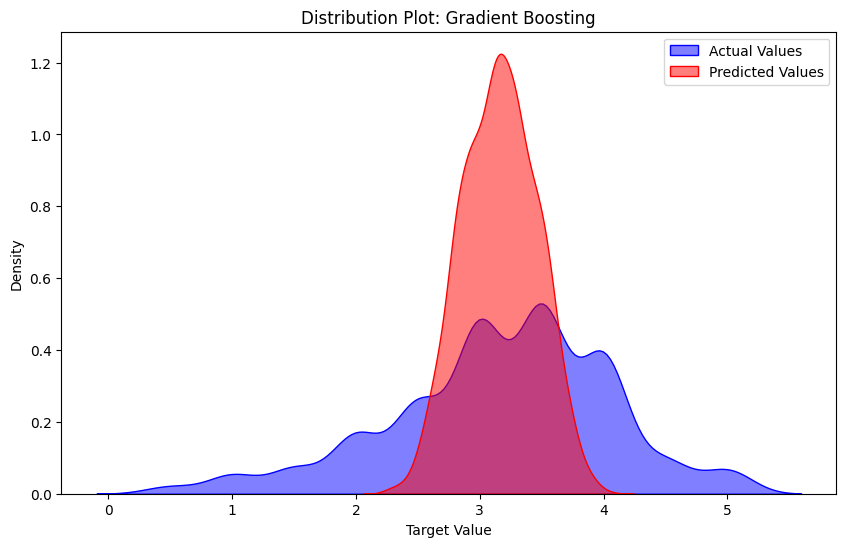

In [59]:
results = train_and_evaluate_models(X, y)